In [1]:
import cv2
import matplotlib.pylab as plt
import numpy as np
import os

In [ ]:
img = cv2.imread('./special/task1_fn_2048/12/fb682b846db0f27bd174aa9bbb70cfa2.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
im_edges = cv2.Canny(im_gray, 100, 100)

In [ ]:
plt.imshow(im_gray, 'gray')
#plt.imshow(im_edges)
plt.show()

In [ ]:
ret, img_thresh = cv2.threshold(im_edges, 170, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh, 'gray')
plt.show()

In [ ]:
kernel = np.ones((2, 2), np.uint8)
erosion = cv2.erode(img_thresh, kernel, iterations = 1)
plt.imshow(erosion, 'gray')
plt.show()
dilation = cv2.dilate(img_thresh,kernel,iterations = 1)
plt.imshow(dilation, 'gray')
plt.show()
opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, 'gray')
plt.show()
closing = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, 'gray')
plt.show()

In [ ]:
kernel = np.ones((1, 1), np.uint8)
img_opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)
img_closing = cv2.morphologyEx(img_opening, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_closing, 'gray')
plt.show()

In [ ]:
# img = cv2.imread('./special/task1_fn_2048/12/fb682b846db0f27bd174aa9bbb70cfa2.jpg', 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# im_edges = cv2.Canny(im_gray, 100, 100)
# ret, img_thresh = cv2.threshold(im_edges, 100, 255, cv2.THRESH_BINARY)
# #contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(img_thresh, 2, 1)

# #cnt = contours[4]
# vis = img.copy()
# cv2.drawContours(vis, contours, -1, (0,255, 255), 3)
# plt.imshow(vis)
# plt.show()

base_dir = './special/task1_fn_2048/12'
for img_file in os.listdir(base_dir):
    img = cv2.imread(os.path.join(base_dir, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im_edges = cv2.Canny(im_gray, 100, 100)
    ret, img_thresh = cv2.threshold(im_edges, 100, 255, cv2.THRESH_BINARY)
    #contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours, hierarchy = cv2.findContours(img_thresh, 2, 1)
    img_rect = img.copy()
    vis = img.copy()
    cv2.drawContours(vis, contours, -1, (0,255, 255), 3)
    plt.imshow(vis)
    plt.show()
    max_area = -1
    w_max = 0
    h_max = 0
    x_max = 0
    y_max = 0
    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        cv2.rectangle(img_rect,(x,y),(x+w,y+h),(0,255,255),2)
        if w*h > max_area:
            max_area = w*h
            w_max = w
            h_max = h
            x_max = x
            y_max = y
    print "max contour"
    img_rect_max = img.copy()
    cv2.rectangle(img_rect_max, (x_max, y_max), (x_max+w_max, y_max+h_max), (0,255, 255), 2)
    plt.imshow(img_rect_max)
    plt.show()
    #plt.imshow(img_rect)
    #plt.show()


    print "max hull"
    #hull = cv2.convexHull(cnt,returnPoints = False)
    max_hull_area = 0 
    img_convex = img.copy()
    img_convex_max = img.copy()
    for cnt in contours:
        hull = cv2.convexHull(cnt)
        #defects = cv2.convexityDefects(cnt,hull)
        cv2.drawContours(img_convex,[hull],0,(255,0,0),-1)

        # for i in range(defects.shape[0]):
        #     s,e,f,d = defects[i,0]
        #     start = tuple(cnt[s][0])
        #     end = tuple(cnt[e][0])
        #     far = tuple(cnt[f][0])
        #     cv2.line(img,start,end,[0,255,0],2)
        #     cv2.circle(img,far,5,[0,0,255],-1)
        area = cv2.contourArea(hull)
        if area> max_hull_area:
            max_hull_area = area
            hull_max = hull
    print max_hull_area
    cv2.drawContours(img_convex_max,[hull_max],0,(255,0,0),-1)
    plt.imshow(img_convex_max)
    plt.show()

In [ ]:
img = cv2.imread('./special/task1_fn_2048/14/7738e543ea3a32070b2fca77a4400aee.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()
im_edges = cv2.Canny(im_gray, 100, 100)
ret, img_thresh = cv2.threshold(im_edges, 100, 255, cv2.THRESH_BINARY)
mser = cv2.MSER()
regions = mser.detect(im_gray, None)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
drawing = np.zeros( img.shape[:2]).astype(np.uint8)

cv2.polylines(drawing, hulls, 1, (255, 255, 0), 20)
plt.imshow(drawing)
plt.show()
#drawing = np.zeros( img.shape[:2]).astype(np.uint8)
#cv2.rectangle( drawing, boundRect[i].tl(), boundRect[i].br(), color, 2, 8, 0 );
hull = cv2.convexHull(hulls[0])
cv2.imshow("hull",hull)
#x,y,w,h = cv2.boundingRect(hulls[0])
#img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#plt.imshow(img)
#plt.show()
#cv2.rectangle(drawing,)

In [ ]:
import sys
img = cv2.imread('../Task1_test/specical/12/test/cb59e98d064a006285d717bdd2cbe791.jpg', 1)
sys.path.insert(0, './pySaliencyMap-master/')
import pySaliencyMap
imgsize = img.shape
img_width = imgsize[1]
img_height = imgsize[0]
sm = pySaliencyMap.pySaliencyMap(img_width, img_height)
#initialize
saliency_map = sm.SMGetSM(img)
binarized_map = sm.SMGetBinarizedSM(img)
salient_region = sm.SMGetSalientRegion(img)
# visualize
#plt.subplot(2,2,1), plt.imshow(img, 'gray')
plt.subplot(2,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input image')
#cv2.imshow("input",  img)
plt.subplot(2,2,2), plt.imshow(saliency_map, 'gray')
plt.title('Saliency map')
# cv2.imshow("output", map)
plt.subplot(2,2,3), plt.imshow(binarized_map)
plt.title('Binarilized saliency map')
#cv2.imshow("Binarized", binarized_map)
plt.subplot(2,2,4), plt.imshow(cv2.cvtColor(salient_region, cv2.COLOR_BGR2RGB))
plt.title('Salient region')
#cv2.imshow("Segmented", segmented_map)
plt.show()

In [ ]:
edge_y, edge_x = np.where(binarized_map > 0)
edge_pts = np.hstack((np.array(edge_x)[:, np.newaxis], np.array(edge_y)[:, np.newaxis]))

In [ ]:
max_x, max_y = edge_pts.max(axis=0)
min_x, min_y = edge_pts.min(axis=0)
print max_x, max_y, min_x, min_y

In [ ]:
base_test_dir = '/mnt/exhdd/tomorning_dataset/wonderland/cv/deep_retriver/paintings_retriver/Task1_test/specical/'
sv_test_dir = '/mnt/exhdd/tomorning_dataset/wonderland/cv/deep_retriver/paintings_retriver/Task1_test_fg/specical/'
for sub_dir in os.listdir(base_test_dir):
    sub_dir_path = os.path.join(base_test_dir, sub_dir, 'test')
    if not os.path.isdir(sub_dir_path):
        continue
    new_dir_path = os.path.join(sv_test_dir, sub_dir)
    if not os.path.exists(new_dir_path):
        os.mkdir(new_dir_path)
        os.mkdir(os.path.join(new_dir_path, 'test'))

    for img_file in os.listdir(sub_dir_path):
        print img_file
        img_file_path = os.path.join(sub_dir_path, img_file)
        img = cv2.imread(img_file_path)
        imgsize = img.shape
        img_width = imgsize[1]
        img_height = imgsize[0]
        sm = pySaliencyMap.pySaliencyMap(img_width, img_height)
        #initialize
        saliency_map = sm.SMGetSM(img)
        binarized_map = sm.SMGetBinarizedSM(img)
        edge_y, edge_x = np.where(binarized_map > 0)
        edge_pts = np.hstack((np.array(edge_x)[:, np.newaxis], np.array(edge_y)[:, np.newaxis]))
        max_x, max_y = edge_pts.max(axis=0)
        min_x, min_y = edge_pts.min(axis=0)
        new_img = img[ min_y:max_y,min_x:max_x, :]
        cv2.imwrite(os.path.join(new_dir_path,'test', img_file), new_img)

09ed6c49e2f52f8159ab8781bdb2230b.jpg
f1a4e25edf5fb15517f78f74b546272e.jpg
219ee5aa248ad14e9cdf5bb1300a042a.jpg
6f07c15c8a37c566d6b207b4a712653b.jpg
f014ca44656f7338f6cdb2d90f4c1af1.jpg
d6e91e9c364f4ebdc3db0bdc0119b93f.jpg
e5d0cd85efec5214a5380be20f1cd6c8.jpg
a2664fbe2ca5553d523e4981c2831b6c.jpg
3f2d9f4b1e310b149b8452032cc1b0d2.jpg
049f5053c73c0b85aa190d26ecdf90f2.jpg
bee2692613566f6cc1975e0303834170.jpg
9f945d462c72220c25ebda542a4debda.jpg
8106f2c599df302a7fe0e5681e8e74a4.jpg
53be990d0dc8809b8b7ca1538c32d34e.jpg
25e3427bb73c7b0d89bc10a0967ff3cf.jpg
fb682b846db0f27bd174aa9bbb70cfa2.jpg
6a4597ba81137eaedb19965650d9556c.jpg
c56ee18dfa289d93fe4da08ad606dabb.jpg
e081a9ebde3ecc574c36b8d8bcac737f.jpg
2bf0ed96af36c1e555efa800d407e191.jpg
58c70ac26dd6168b3668f554c87dc88e.jpg
43abe7c5baaf2c25389eac952d3401c9.jpg
b0728ae4b26c3ac23443782fd69c54c9.jpg
08c27d9d44122fba30c17a3ce7390558.jpg
7c1b72e8a8a4a1510b71bb9300cc215d.jpg
e75311841018a4d423c6dcef13516ebd.jpg
82c4f1f95e7f40e309dd38155dc3f140.jpg
5

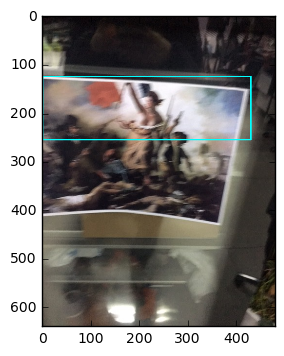

w_max, h_max 427 130
binary salinecy


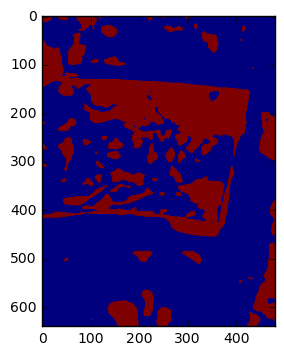

4a07cc793bebb7fd4f1f0545daea7f06.jpg
263a92bb22f731911fe5292cdf99e46c.jpg
293860f50f6d9bcc0ea02f3936f63b24.jpg
73c4d5523d7a25dd2b9b202b25d12650.jpg
max contour


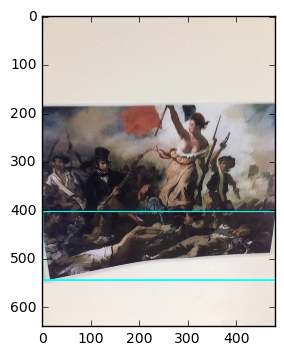

w_max, h_max 478 141
binary salinecy


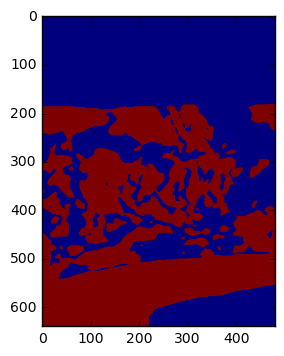

e79185210cc4986d54927cecb5a01f3b.jpg
53800c0c6f72eb376e8988c616ca7f98.jpg
bfbd5ac2be1441b3515f6dabb60320fb.jpg
b8f2c4d17fca9055d886e467265fd80f.jpg
dbaa1e3a965a5280f9befcd0cc53c443.jpg
e939c8c677bddcaab1da7836894894f5.jpg
4bdde202d473818a94a48969dc38cadb.jpg
c6850b7781f2189227fdd0d25174be7e.jpg
412fee3b65fe546f402c241d0eca498a.jpg
315f92ca9682f1fa2dc3768787218a30.jpg
7b2df7d922fa04a5aa4fb2453012a681.jpg
3468a031a1578036bc406013921cd1ae.jpg
37f10c3d714f548a55085cafcbb9f285.jpg
863604982c4385f206f1ddc1e027587d.jpg
8977214df535e41d076e261bf3522c7e.jpg
83f02d5618f7b570532df83a827d00a5.jpg
af2980bd199bbc2a9438a62546a99616.jpg
e34216b274ad3c2cef2bd5bd45c8790a.jpg
87033504655587a07ea03034c50be2ee.jpg
702a5ddfdb394e6a0e88066195d1783e.jpg
e809025fea557db89c8e6d35145b4df9.jpg
774599a9b42740cda077f4e57953d8d7.jpg
6a35ee9bfc3c52bbf48b9a54e8e1f71b.jpg
824bb85a6fd356bf5eea9c6de69340bf.jpg
max contour


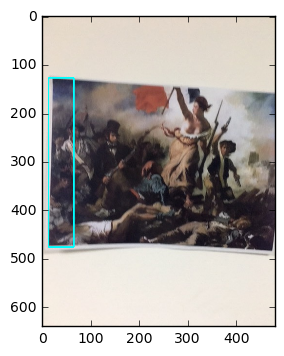

w_max, h_max 52 348
binary salinecy


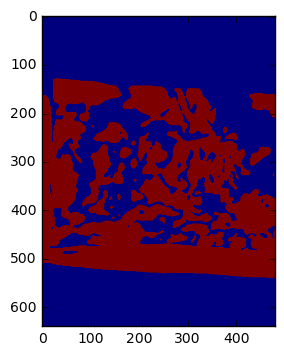

6af737604fbc3623850d697487a07705.jpg
08f2f33f9fea0b63d5344fcf833e6048.jpg
f257c2a0effb068b8666def503782a71.jpg
8cdaf40331c08fbbd1aedc7e614386b9.jpg
cb491db70387f00eff05532d9b288949.jpg
04b66a73c182190d2b61d2d3e6d01e4e.jpg
899bb69844e1d76be12b3838636a839e.jpg
110abd7fb3ef449ea0cc349611318bdd.jpg
5e31b294747c9331e55685277fe7ab38.jpg
max contour


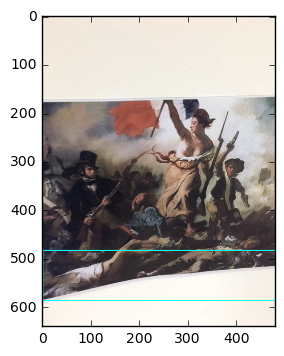

w_max, h_max 478 103
binary salinecy


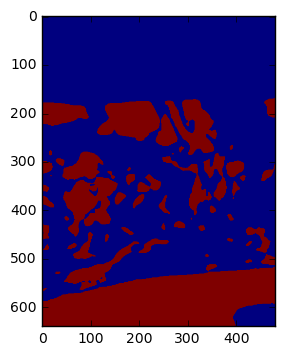

35f4935fc09c3241fdc1c83b37310b08.jpg
c956ede0e8caea166acfc7e95a764865.jpg
ea087b301cc9a9ba0e09ca409ba114d7.jpg
6707a6c3b5d6c31c26fd5eea6268212f.jpg
2eb264dddd83713fa9f54e79e827db0d.jpg
a5fc2958c70abe530ea5a63488d0e17d.jpg
max contour


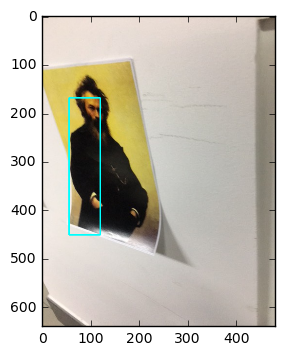

w_max, h_max 64 282
binary salinecy


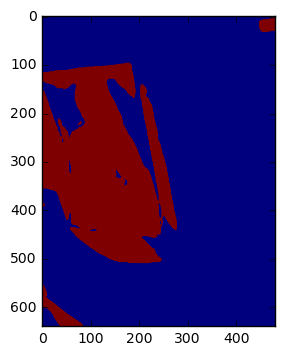

13fe1bbd2f811298509ae8eb11764120.jpg
7ca4ca9565823e073b6d01db44f1307f.jpg
733ab6fe295c3815ce2de805e1205539.jpg
c13c4f37a84bb340b88ddedbbc155686.jpg
61cd0a0dc9a446054bde74bdd7b472c5.jpg
d64a3c2f400addb0fe5b91c9c634b414.jpg
1dbab031728628291d9c8e3a7b8dade5.jpg
8a66303ec5b7afec44cb448dab669677.jpg
03c8d75e0a4fca2c54f7b4e0f9d547b6.jpg
9e7953607434356b934a052399c2d091.jpg
05a113d88e10c5cbfca77a51cba062d8.jpg
dabc6e7d101fe5d848676b45613e57fa.jpg
69ca380aef280a51b675d3aa6e046571.jpg
68e0f08b2c64e68174fdc13bfb7edbc3.jpg
ede87627a3cfb457750731ae9c835890.jpg
0febc205b0d27b0a80915d4f06957656.jpg
615f55d83b7f5e0c2ab88bc9877af781.jpg
727e08054e483ee25a587df3ca93ea8a.jpg
5089d34148f5f2ec6c5fd48afb144f03.jpg
b0a90e4d0dda2a0b42a4f2f3fe28d1b4.jpg
6fa944ad0c9edf23887cc1db11060c4b.jpg
2427e3fa8f422f6c43daa2d06f7d87b4.jpg
4554e9a54531f224c06ad28c2e9e2cab.jpg
e7dce2695290da0289573d605d6f20ec.jpg
max contour


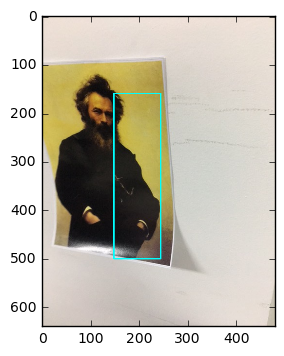

w_max, h_max 96 340
binary salinecy


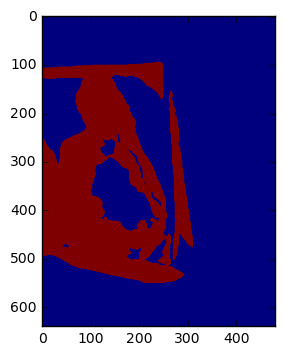

8b0944c1168bfbd10b84c68431ec4182.jpg
185ef3a004d82b008649e10f759764b6.jpg
73c946bae6d89892d8775fdf35d95900.jpg
3d4a7935b221cdfbac25ce31247a41b0.jpg
ed24460977b93b62fb228e57f73213f9.jpg
91606e5d4a602a6ce32cec8b7b34a377.jpg
ca6ae311b23cf2a35ae6995d6092d73d.jpg
8b2d8f1ffc4b131e6697a54bc6fa5890.jpg
6af68a9fdbc7e9f37d56b4e231eb0ccd.jpg
643609b2ce7d8b35358f778a75aba0f4.jpg
ed6bafa8db6e92bea454b252aa5e5536.jpg
b9c957ee3d21fcbf8f3c38f0735d19b7.jpg
4fbdd447154812b540c506cce9cb255e.jpg
b1bb592e73f877e298a76bf56cfd403f.jpg
8861b4501be6d10731e2918eef089658.jpg
1242616bb8b8fd3212d5a9684886bddb.jpg
max contour


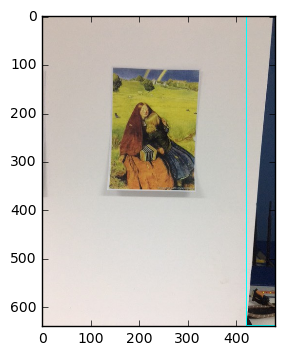

w_max, h_max 60 638
binary salinecy


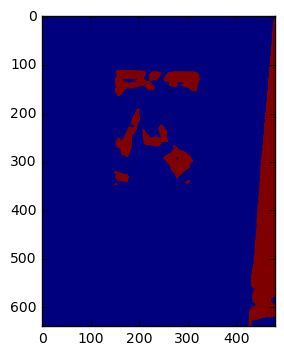

0a3ca4b6a9f7e04647e019cadd2d2273.jpg
20b57bbbefc326583a944d18ae0f8b50.jpg
11567553d32437f0b275e662fd6895af.jpg
5e7f6e5ba83f70ef1675eeafed1671e9.jpg
2cc8477531edf77837fcfad0518659ce.jpg
7e93bb1e9d30a19f9b802b31d883465a.jpg
00bbf542c3608401ed46dbd9ca3e1c29.jpg


In [20]:
#This is using max contour area
import sys
sys.path.insert(0, './pySaliencyMap-master/')
import pySaliencyMap
base_test_dir = '/mnt/exhdd/tomorning_dataset/wonderland/cv/deep_retriver/paintings_retriver/Task1_test/specical/'
sv_test_dir = '/mnt/exhdd/tomorning_dataset/wonderland/cv/deep_retriver/paintings_retriver/Task1_test_fg/special_max_contour_2/'
for sub_dir in os.listdir(base_test_dir):
    sub_dir_path = os.path.join(base_test_dir, sub_dir, 'test')
    if not os.path.isdir(sub_dir_path):
        continue
    new_dir_path = os.path.join(sv_test_dir, sub_dir)
    if not os.path.exists(new_dir_path):
        os.mkdir(new_dir_path)
        os.mkdir(os.path.join(new_dir_path, 'test'))

    for img_file in os.listdir(sub_dir_path):
        print img_file
        img_file_path = os.path.join(sub_dir_path, img_file)
        img = cv2.imread(img_file_path)
        img_bgr = img.copy()
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        im_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        im_edges = cv2.Canny(im_gray, 100, 100)
        ret, img_thresh = cv2.threshold(im_edges, 100, 255, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(img_thresh, 2, 1)
#         img_rect = img.copy()
#         vis = img.copy()
#         cv2.drawContours(vis, contours, -1, (0,255, 255), 3)
#         plt.imshow(vis)
#         plt.show()
        max_area = -1
        w_max = 0
        h_max = 0
        x_max = 0
        y_max = 0
        for contour in contours:
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(img_rect,(x,y),(x+w,y+h),(0,255,255),2)
            if w*h > max_area:
                max_area = w*h
                w_max = w
                h_max = h
                x_max = x
                y_max = y
#         print "max contour"
#         img_rect_max = img.copy()
#         cv2.rectangle(img_rect_max, (x_max, y_max), (x_max+w_max, y_max+h_max), (0,255, 255), 2)
#         plt.imshow(img_rect_max)
#         plt.show()
        if w_max*1.0/ h_max >3.0 or  h_max*1.0 /w_max> 3.0:
            print "max contour"
            img_rect_max = img.copy()
            cv2.rectangle(img_rect_max, (x_max, y_max), (x_max+w_max, y_max+h_max), (0,255, 255), 2)
            plt.imshow(img_rect_max)
            plt.show()
            print 'w_max, h_max', w_max, h_max
            imgsize = img.shape
            img_width = imgsize[1]
            img_height = imgsize[0]
            sm = pySaliencyMap.pySaliencyMap(img_width, img_height)
            #initialize
            saliency_map = sm.SMGetSM(img)
            binarized_map = sm.SMGetBinarizedSM(img)
            edge_y, edge_x = np.where(binarized_map > 0)
            edge_pts = np.hstack((np.array(edge_x)[:, np.newaxis], np.array(edge_y)[:, np.newaxis]))
            max_x, max_y = edge_pts.max(axis=0)
            min_x, min_y = edge_pts.min(axis=0)
            new_img = img_bgr[ min_y:max_y,min_x:max_x, :]
            print 'binary salinecy'
            plt.imshow(binarized_map)
            plt.show()
        
        else:
            new_img = img_bgr[ y_max:y_max+h_max,x_max:x_max+w_max, :]
        cv2.imwrite(os.path.join(new_dir_path,'test', img_file), new_img)